<a href="https://colab.research.google.com/github/AjayShivran/proj3/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd

In [ ]:
#Loading the dataset
df=pd.read_csv('dataset.csv')
df.head()

,Device,Question,Answer
0,Mouse,What kind of mouse can I buy?,There are many types of computer mouse and tra...
1,Mouse,"What are the differences between wired mouse, ...",While a wired mouse is powered by the connecti...
2,Mouse,What is the difference between a gaming and no...,Gaming mice are special mice that are more sui...
3,Mouse,Does a mouse need some sort of mousepad to fun...,If your mouse works without one and you can us...
4,Mouse,"What is the difference between speed, control ...","Hard pads, like most other mice pads on the ma..."


In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Data we want to encode.
sentences = df["Question"]

#Encoding the Data
embedding = model.encode(sentences)

In [ ]:
len(df)

65

In [ ]:
embedding[0]

In [ ]:
len(embedding[0])

384

In [ ]:
#Defining cosine similarity function
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
#Using similarity values to answer queries
while(True):
    query = input("User: ")
    query_vec = model.encode([query])[0]
    sim=[]
    for sent in sentences:
        sim.append(cosine(query_vec, model.encode([sent])[0]))
    if(max(sim)>0.4):
        print("Chatbot: ", df['Answer'][sim.index(max(sim))])
    else:
        print("Chatbot: Sorry, I could not understand.")
        continue
    if(df['Answer'][sim.index(max(sim))]=="Thank you! See you again."):
        break

User: byeee
Chatbot:  Thank you! See you again.


In [ ]:
pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
# Sentences we want sentence embeddings for
sent= df['Question']
for sentences in sent:
  #Mean Pooling - Take attention mask into account for correct averagingdef mean_pooling(model_output, attention_mask):
  def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

  # Load model from HuggingFace Hub
  tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-MiniLM-L6-v2')
  model = AutoModel.from_pretrained('sentence-transformers/paraphrase-MiniLM-L6-v2')

  # Tokenize sentences
  encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

  # Compute token embeddingswith torch.no_grad():
  model_output = model(**encoded_input)

  # Perform pooling. In this case, max pooling.
  sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

  #print("Sentence embeddings:")
#print(sentence_embeddings)

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/86.7M [00:00<?, ?B/s]

In [ ]:
from nltk.cluster import KMeansClusterer
import nltk

def clustering_question(df,sentence_embeddings,NUM_CLUSTERS = 8):

#sentences = df['text']
# sentence_embeddings
# X = np.array(df['emb'].tolist())
    X = np.array(sentence_embeddings)
    kclusterer = KMeansClusterer(
        NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
        repeats=500,avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

    df['cluster'] = pd.Series(assigned_clusters, index=df.index)
    df['centroid'] = df['cluster'].apply(lambda x: kclusterer.means()[x])

    return df, assigned_clusters

In [ ]:
df, assigned_clusters=clustering_question(df,embedding)


In [ ]:
df


,Device,Question,Answer,cluster,centroid
0,Mouse,What kind of mouse can I buy?,There are many types of computer mouse and tra...,0,"[-0.5779606, -0.4895392, 0.34545186, -0.282535..."
1,Mouse,"What are the differences between wired mouse, ...",While a wired mouse is powered by the connecti...,1,"[-0.18606561, -0.53207093, 0.058563497, -0.452..."
2,Mouse,What is the difference between a gaming and no...,Gaming mice are special mice that are more sui...,1,"[-0.18606561, -0.53207093, 0.058563497, -0.452..."
3,Mouse,Does a mouse need some sort of mousepad to fun...,If your mouse works without one and you can us...,1,"[-0.18606561, -0.53207093, 0.058563497, -0.452..."
4,Mouse,"What is the difference between speed, control ...","Hard pads, like most other mice pads on the ma...",1,"[-0.18606561, -0.53207093, 0.058563497, -0.452..."
...,...,...,...,...,...
60,Bye,Bye,Thank you! See you again.,4,"[-0.04347105, 0.283682, 0.40030953, -0.1256684..."
61,Bye,Cya,Thank you! See you again.,4,"[-0.04347105, 0.283682, 0.40030953, -0.1256684..."
62,Bye,Okay thank you for helping,Thank you! See you again.,4,"[-0.04347105, 0.283682, 0.40030953, -0.1256684..."
63,Bye,Thank you for answering,Thank you! See you again.,4,"[-0.04347105, 0.283682, 0.40030953, -0.1256684..."


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2500, random_state=23)
np.set_printoptions(suppress=True)
tsne = model.fit_transform(embedding)
coord_x = tsne[:, 0]
coord_y = tsne[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


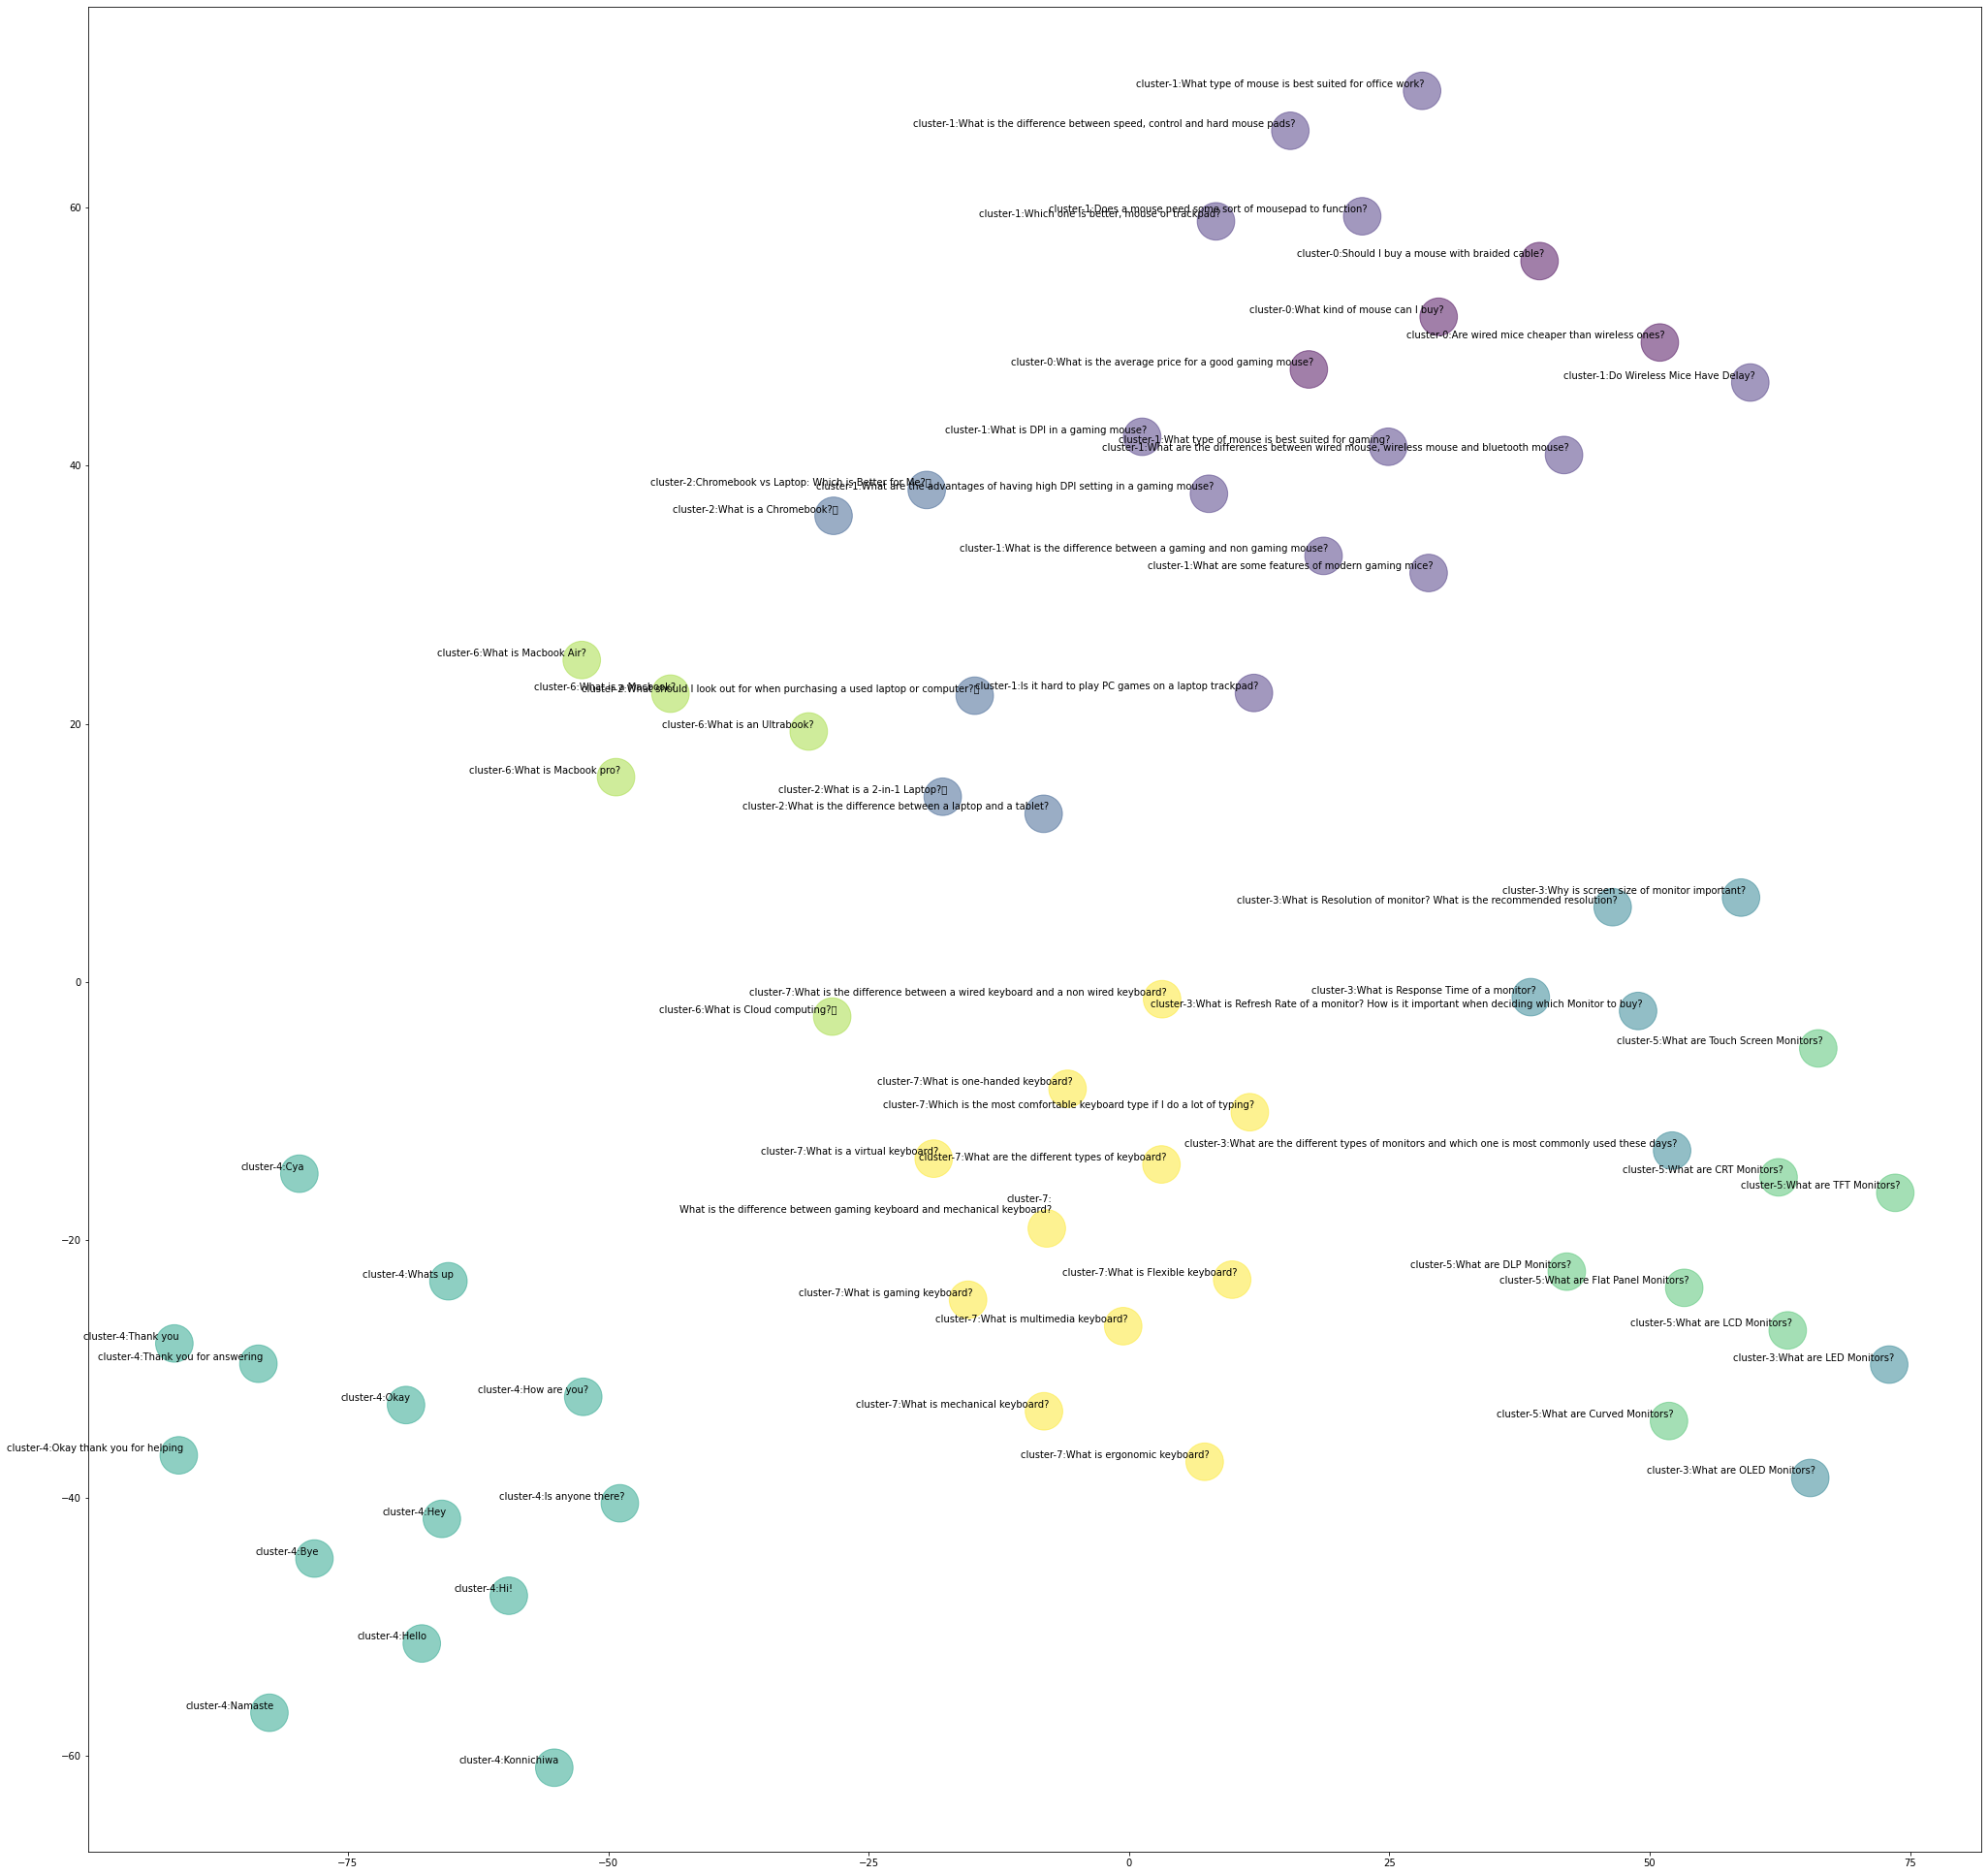

In [ ]:
import matplotlib.pyplot as plt

labels = df['Question'].tolist()
# Plot sentences
plt.figure(figsize=(35, 35))
plt.scatter(coord_x, coord_y, c=assigned_clusters, s=1500,alpha=.5)
sentences = df['Question']

for j in range(len(sentences)):
    plt.annotate(
        f"cluster-{assigned_clusters[j]}:" + labels[j],
        xy=(coord_x[j], coord_y[j]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right', va='bottom')

plt.show()

In [ ]:
while(True):
    query = input("User: ")
    query_vec = model.encode([query])[0]
    sim=[]
    for sent in sentences:
        sim.append(cosine(query_vec, model.encode([sent])[0]))
    if(max(sim)>0.4):
        print("Chatbot: ", df['Answer'][sim.index(max(sim))])
    else:
        print("Chatbot: Sorry, I could not understand.")
        continue
    if(df['Answer'][sim.index(max(sim))]=="Thank you! See you again."):
        break